In [1]:
import matplotlib.pyplot as plt, mpld3
from mpld3 import plugins

import pandas as pd
import numpy as np
import random
from random import randint
import string
from random import randrange
from datetime import datetime as date
import time

import pdb
%matplotlib inline
mpld3.enable_notebook()

/Users/asiega/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
columns = ["company", "dashboard", "ip", "visited"]
companies = ["fb", "twitter", "exxon", "twilio", "google", "amazon", "ckm"]
dashboards = ["cat", "dog", "elf"]

In [5]:
# http://stackoverflow.com/questions/25246394/generate-a-random-iso8601-date-with-python
# Faker also exists, but it's fun to practice the manual approach!

def random_date_generator():
    start = time.mktime(date.today().replace(day=1, month=1, year=2016).timetuple())
    end = time.mktime(date.today().timetuple())
    return date.fromtimestamp((randint(start,end)))

def data_generator(size=1000, fields=columns):
    bones = {col: [] for col in fields}
    for num in range(0,size):
        bones["company"].append(random.choice(companies))
        bones["dashboard"].append(random.choice(dashboards))
        bones["ip"].append("20." + ".".join(str(randint(0, 255)) for _ in range(3)))
        bones["visited"].append(random_date_generator())
    return pd.DataFrame(bones, index=range(0,size))
        

In [63]:
data = data_generator(size=500)
data["visited_month"] = data["visited"].apply(lambda x: x.month)
data["visited_weekday"] = data["visited"].apply(lambda x: x.strftime('%A'))
data["visited_date"] = data["visited"].apply(lambda x: x.date())

In [7]:
# find num of visits per day; fill in no-visit days with 0

visit_counts = data.groupby(["visited_date"])["ip"].count()
visit_counts.index = pd.DatetimeIndex(visit_counts.index)
max_date, min_date = max(data["visited_date"]), min(data["visited_date"])
date_range = pd.date_range(min_date, max_date)
visit_counts = visit_counts.reindex(date_range, fill_value=0)
visit_counts.name="visits"
visit_counts.head()

2016-01-01    1
2016-01-02    2
2016-01-03    2
2016-01-04    2
2016-01-05    0
Freq: D, Name: visits, dtype: int64

In [10]:
visit_counts.to_csv("visits_data.csv")

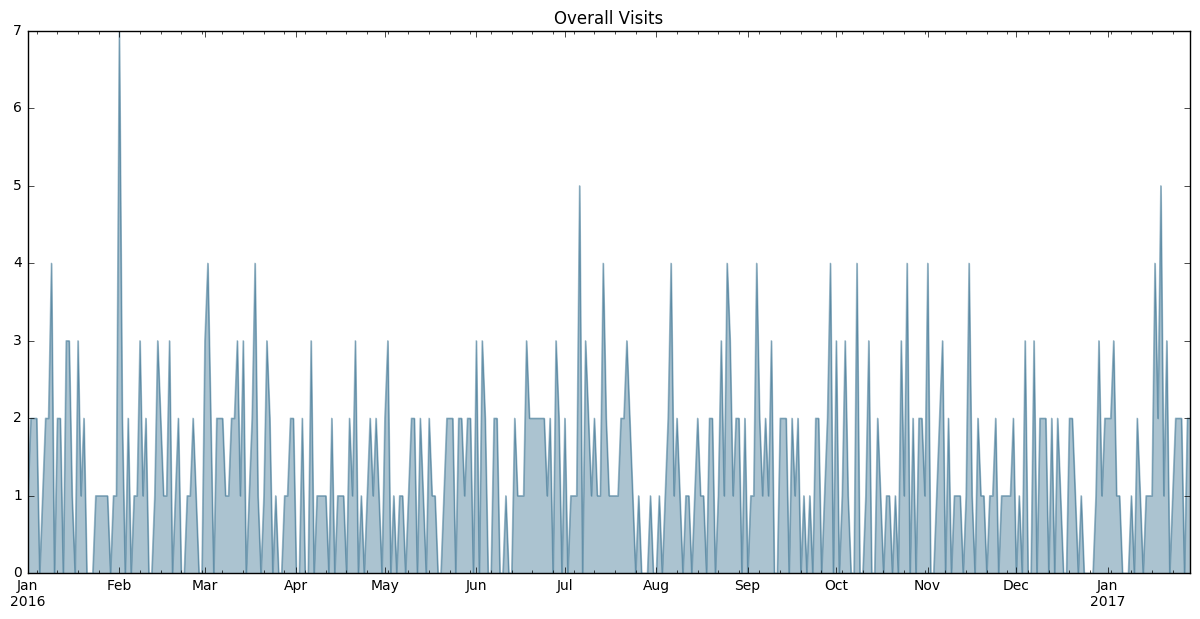

In [12]:
visit_counts.plot.area(figsize=(15,7), color="#2E6A8B", alpha=0.4, title="Overall Visits")

In [32]:
def create_swivel_plot(field, data=data, color="lightblue"):
    ax = data.groupby(field)[field].count().plot.bar(color=color, alpha=0.5, edgecolor="none", title=("Visits by %s" % field.capitalize()))
#     ax.set_xlabel(field.capitalize())
    ax.set_ylabel("Number of Visits\n")
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    for index, bar in enumerate(ax.containers):
        for i, b in enumerate(bar.get_children()):
            height = int(b.get_height())
            tooltip = mpld3.plugins.LineLabelTooltip(bar[i], label=str(height))
            mpld3.plugins.connect(ax.get_figure(), tooltip)
    return ax

In [61]:
data.groupby("company")["company"].count().to_frame().to_csv("company_data.csv")

In [89]:
# {label:"Art and Humanities", "Not Satisfied":25, "Not Much Satisfied":40, "Satisfied": 15, "Very Satisfied":20},

subset = data[["company", "dashboard", "visited"]]
visit_counts = subset.groupby(["company", "dashboard"]).count().reset_index()
visit_pivot = visit_counts.pivot(index='company', columns='dashboard', values='visited')

# json_data = []
# for index, row in visit_pivot.iterrows():
#     row_data = row.to_dict()
#     row_data["label"] = row.name
#     json_data.append(row_data)
    
visit_pivot.to_csv("viz/comp_dash_data.csv")

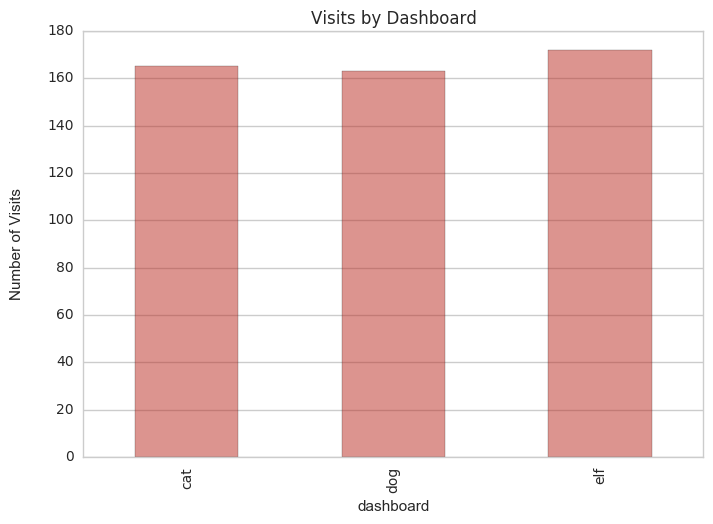

In [30]:
dash = create_swivel_plot("dashboard", color="#BA2B21")
mpld3.save_html(dash.get_figure(), "dash.html")

In [ ]:
by_dash = data.groupby(["dashboard", "visited_date"])["visited"].count().to_frame().reset_index()
agent = by_dash[by_dash["dashboard"] == "agent"]
agent[["visited_date", "visited"]].set_index("visited_date").plot()

In [ ]:
comp_dash = data.groupby(["company", "dashboard"])["visited"].count().to_frame().reset_index()

In [20]:
import seaborn as sns
sns.set_style("whitegrid")
comp_dash_plot = sns.factorplot(x="company", y="visited", alpha=0.8, hue="dashboard", kind="bar", legend=True, data=comp_dash, size=5, aspect=1.5)
# mpld3.save_html(comp_dash_plot, "comp_dash.html")

NameError: name 'comp_dash' is not defined